# Podstawy przetwarzania sygnałów - LAB

    prowadzący: Monika Wasilewska
    Politechnika Wrocławska, Katedra Akustyki, Multimediów i Przetwarzania Sygnałów
    Proszę nie rozpowszechniać plików z zajęć - z góry dziękuję :)

Run a cell via `Shift + Return`. Learn more about [CoCalc Jupyter Notebooks](https://doc.cocalc.com/jupyter.html).

### Imię nazwisko, Nr indeksu

Proszę wpisać swoje dane po dwukrotnym kliknięciu myszką w komórkę. Dokładnie tam gdzie jest imię wpisujecie swoje imię itd.!

## Zajęcia 2

1. Pojęcie próbkowania i kwantyzacji
2. Częstotliwość próbkowania
3. Korelacja jako miara podobieństwa i jej zastosowanie

Co przygotować w domu na następne zajęcia?

1. Zainstalować Matlab/Octave na swoim komputerze
2. Przeanalizować wszystko o czym rozmawialiśmy dzisiaj (uwaga! będę pytać losowo wybrane osoby)
3. Rozumieć i umieć samodzielnie napisać to co było do tej pory na zajęciach

___

### Pojęcie próbkowania i kwantyzacji

**Próbkowanie** - 


![probkowanie](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Sampled.signal.svg/270px-Sampled.signal.svg.png)

**Kwantyzacja** - **Tutaj zapisz definicję, poniżej rysunek obrazujący pojęcie**

[![kwantyzacja](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b7/3-bit_resolution_analog_comparison.png/286px-3-bit_resolution_analog_comparison.png)]

### Częstotliwość próbkowania

Jak poprawnie wybrać częstotliwość próbkowania? Na razie ograniczmy się do stwierdzenia, że częstotliwość próbkowania musi być większa bądź równa dwukrotności największej częstotliwości występującej w sygnale.
Możemy zapisać to wzorem: $$ f_s >= 2f_{max}$$ gdzie $f_s$ to częstotliwość próbkowania, a $f_{max}$ to najwyższa częstotliwość występująca w sygnale. Dlaczego akurat dwa razy większa wyjaśnimy sobie na kolejnych zajęciach.

#### Zadanie 1

Jaką minimalną poprawną częstotliwość próbkowania dobierzesz dla sygnału **s(t)** zapisanego wzorem poniżej? Odpowiedź zapisz w kolejnej komórce.
$$s(t) = 15\cdot \sin(2\pi \cdot 4t)+2 \cos(2\pi \cdot 10t) - 30\sin(15\pi t)$$


**ODPOWIEDŹ:** $$sig(t) = A\cdot*sin(2\[pi]*t + \phi)$$

$$ sig(t) = A\cdot sin(2\pi ft + \phi)$$

$$fs_{min} = 2\cdot f_{max} = 2 \cdot 7.5 = 15 [Hz]$$




#### Zadanie 2

Wygeneruj 1 sekundę sygnału s(t) zdefiniowanego wzorem poniżej a następnie wyrysuj jego przebieg korzystając z wiedzy z poprzednich zajęć. Przy generowaniu wektora czasu skorzystaj z częstotliwości próbkowania równej $f_s = 100 [Hz]$
$$ s(t) = 2\sin(2\pi \cdot 2t)+ 3 \cos(2\pi \cdot 8t)$$.

In [7]:
% tutaj jest miejsce na napisanie kodu
fs = 100; %[hZ] = [1/s]
delta_t = 1/fs;
t=0: delta_t:1-delta_t; #zaczynam generowac od t=0, idzie zgodnie z delta_t a skonczy sie w 1-delta_t
sig = 2*sin(2*pi *2*t) + 3*cos(2*pi*8*t);
figure;
plot(t,sig);






#### Zadanie 3
W rzeczywistości na nasze sygnały wpływ będą miały różne czynniki np. jeśli będziemy nagrywać wywiad w pobliżu drogi szybkiego ruchu to oprócz głosu naszego rozmówcy nagrany zostanie szum generowany ruch uliczny. Aby zasymulować takie zjawiska będziemy posługiwali się funkcjami **rand()** oraz **randn()**. Sprawdź w dokumentacji czym różnią się te funkcje. Następnie z ich pomocą wygeneruj dwa rodzaje szumu który będzie trwał 1 sekundę, a częstotliwość próbkowania będzie wynosić $f_s=150 [Hz]$. Wyświetlmy je obok siebie korzystając z funkcji **subplot()**.

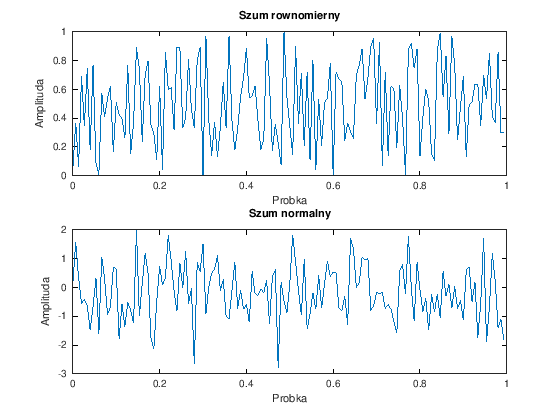

In [17]:
% tutaj jest miejsce na napisanie kodu

%w matlabie zawsze liczymy od 1
fs = 150;
delta_t = 1/fs;
t = 0:delta_t:1-delta_t;

szum_row = rand(1,length(t));
szum_norm = randn(1,length(t));
figure;
subplot(2,1,1);
plot(t,szum_row);
xlabel("Probka");
ylabel("Amplituda");
title("Szum rownomierny")

subplot(2,1,2)
plot(t,szum_norm)
xlabel("Probka");
ylabel("Amplituda");
title("Szum normalny")





#### Zadanie 4

Wyrysujmy sumę funkcji sinusoidalnej o zadanych poniżej parametrach z szumem gaussowskim wygenerowanym w poprzednim zadaniu.
$$ A=2,\ f=2[Hz],\ \phi=\frac{\pi}{6} $$
Jaką częstotliwość próbkowania musimy użyć abyśmy mogli dodać do siebie dwa sygnały?

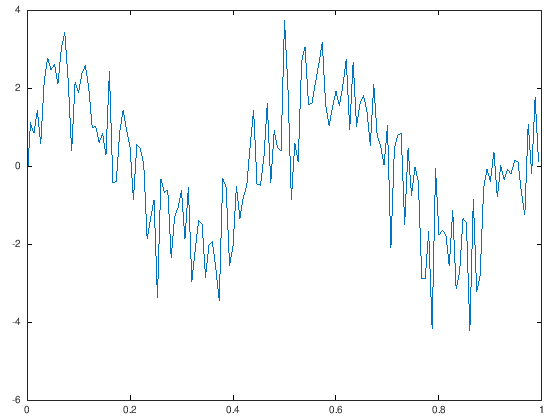

In [19]:
% tutaj jest miejsce na napisanie kodu
A=2;
f =2;
phi=pi/6;
fs = 150;
delta_t = 1/fs;
t = 0:delta_t:1-delta_t;
szum_norm = randn(1,length(t));
a = A*sin(2*pi*f*t+phi)+szum_norm;
plot(t,a);







### Wczytywanie pliku .wav

Aby wczytać plik audio będziemy korzystać z funkcji ___audioread()___. Korzystać będziemy z pierwszej formy jej użycia podanej w dokumentacji. Co zwróci w tym przypadku funkcja?

Link do dokumentacji: https://www.mathworks.com/help/matlab/ref/audioread.html

#### Zadanie 5

Wczytaj, a następnie wyrysuj sygnał ___czepek.wav___ dostępny na moodlu przy dzisiejszym temacie. Pamiętaj o opisaniu wykresu!



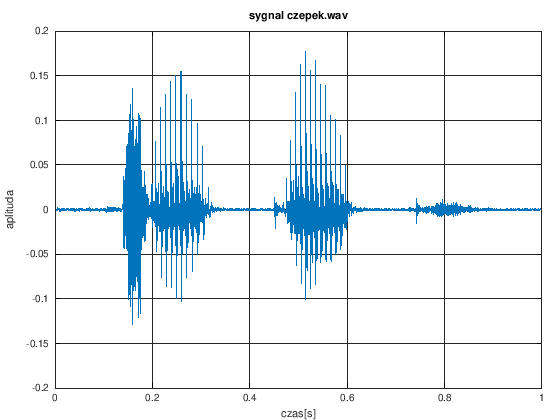

In [5]:


file = 'czepek.wav';
[sig,fs] = audioread(file);
len = length(sig);
t = 0:1/len:1-1/len;

figure
plot(t,sig);
xlabel('czas[s]');
ylabel('aplituda');
title('sygnal czepek.wav');
grid on;





### Zadanie 6
"Wytnij" fragment sygnału, który będzie zawierał fonem 'cz' (na ten moment możesz to trudne słowo jakim jest fonem interpretować jako coś podobnego do głoski) z wczytanego sygnału ___czepek.wav___. Czas początku fonemu to $t_p=0.05 [s]$, a czas końca $t_k = 0.145 [s]$

tk1 =  0.14500


error: sig(0): subscripts must be either integers 1 to (2^63)-1 or logicals


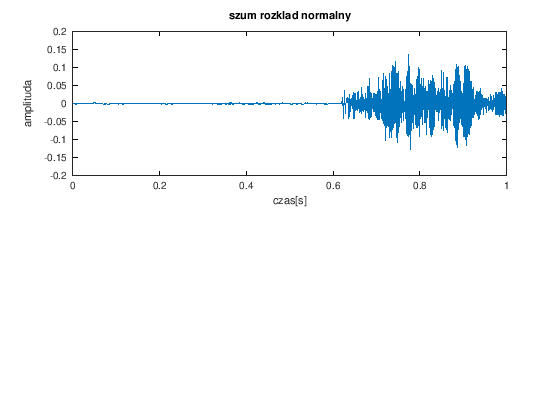

In [4]:
% tutaj jest miejsce na napisanie kodu

tp = 0.05;
tk1 = 0.145
file = 'czepek.wav';
[sig,fs] = audioread(file);
len = length(sig);
t = 0:1/len:1-1/len;

start = round(fs*tp);
stop = round(fs*tk1);
sig_frag=sig(start:stop);
len = length(sig_frag);
t=0:1/len:1-1/len;

figure
subplot(2,1,1)
plot(t,sig_frag);
xlabel('czas[s]');
ylabel('amplituda');
title('szum rozklad normalny');










___